In [1]:
import seml
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scanpy as sc
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
sc.set_figure_params(dpi=80, frameon=False)
sc.logging.print_header()

/home/icb/leon.hetzel/miniconda3/envs/py38/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 pynndescent==0.5.2


In [2]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
adata = sc.read("../datasets/lincs_smiles.h5ad")

<IPython.core.display.Javascript object>

In [4]:
results = seml.get_results(
    "lincs_small_5", to_data_frame=True, fields=["config", "result", "host"]
)  # fields=['result']|

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

/home/icb/leon.hetzel/miniconda3/envs/py38/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


<IPython.core.display.Javascript object>

In [5]:
idx = 296

columns = [c for c in list(results) if "config" in c or c == "result.total_epochs"]
result_idx = results[results.index == idx][columns].copy()
result_idx

,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.mol_featurizer,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.loss_ae,config.model.additional_params.patience,config.model.additional_params.seed,config.model.gnn_model.GCN.hparams.n_layers,config.model.gnn_model.hparams.n_layers,config.model.gnn_model.model_type,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.training.checkpoint_freq,config.training.ignore_evaluation,config.training.max_minutes,config.training.num_epochs,config.training.save_checkpoints,config.training.save_dir,config.seed,result.total_epochs
296,297,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,3,0.000347,3,0.000204,64,4,0.003467,0.000002,512,128,256,1,0.003467,0.000002,128,0.384997,2.041647,12.02193,45,40,False,600,2000,True,sweeps/checkpoints,163890034,200


<IPython.core.display.Javascript object>

In [6]:
config_dict = {"hparams": {}}

config = result_idx
for key, value in config.to_dict().items():
    keys = key.split(".")
    if "datasets" in keys:
        config_dict[keys[-1]] = value[idx]
    elif "training" in keys:
        config_dict[keys[-1]] = value[idx]
    elif "hparams" in keys:
        config_dict["hparams"][keys[-1]] = value[idx]
    else:
        config_dict[keys[-1]] = value[idx]

# config_dict

<IPython.core.display.Javascript object>

In [7]:
import torch
from compert.train import prepare_compert

fname = f'../sweeps/checkpoints/model_seed={config_dict["seed"]}_epoch={config_dict["total_epochs"]}.pt'
print(f"Loading model checkpoint: {fname}")

state, args, history = torch.load(fname, map_location=torch.device("cpu"))

Using backend: pytorch


Loading model checkpoint: ../sweeps/checkpoints/model_seed=163890034_epoch=200.pt


<IPython.core.display.Javascript object>

In [8]:
np.array(results.loc[296,'result.test'])


array([[ 0.74796944,  0.35003333, -1.12957383, -4.52891254],
       [ 0.89086718,  0.6844134 , -0.13499093, -0.10016109],
       [ 0.92135753,  0.86392902, -0.33252307, -0.20540892],
       [ 0.92909624,  0.83584664, -0.41821722, -0.42977887],
       [ 0.91722952,  0.89143855, -0.39448219, -0.3743134 ],
       [ 0.92539471,  0.84718229, -0.58926681, -0.62062991]])

<IPython.core.display.Javascript object>

In [9]:
# Adjust args
args = args.copy()
args["dataset_path"] = "../datasets/lincs_smiles.h5ad"
args["gnn_model"] = None

for k, v in config_dict.items():
    args[k] = v if k not in list(args) else args[k]

<IPython.core.display.Javascript object>

In [10]:
# args

<IPython.core.display.Javascript object>

In [11]:
# load the dataset and model pre-trained weights
model, datasets = prepare_compert(args, state_dict=state)

Starting to read in data: ../datasets/lincs_smiles.h5ad
...
Finished data loading.
Learning parameter embedding for drugs.


<IPython.core.display.Javascript object>

In [12]:
from compert.train import evaluate_r2, evaluate_logfold_r2, evaluate

evaluate_r2(model, datasets["test_treated"], datasets["test_control"].genes)

Number of different r2 computations: 3


[0.762864719316981, 0.3108959642313136, 0.0, 0.0]

<IPython.core.display.Javascript object>

In [13]:
ds_treated = datasets["test_treated"]
ds_ctrl = datasets["test_control"]

evaluate_logfold_r2(model, ds_treated, ds_ctrl)

0.0

<IPython.core.display.Javascript object>

In [14]:
evaluate(model, datasets)

Number of different r2 computations: 3
Number of different r2 computations: 74
Number of different r2 computations: 3

Took 1.8 min for evaluation.



{'training': [0.7586785299718857,
  0.7130700923228277,
  0.03554772692137942,
  0.030444130562973015],
 'test': [0.801329893307244, 0.7254796759758105, 0.0, 0.0],
 'ood': [0.7988439563657508, 0.7081769298985462, 0.0, 0.0],
 'training_logfold': 0.013095360171882155,
 'test_logfold': 0.009852035616067475,
 'ood_logfold': 0.027063445192690144,
 'perturbation disentanglement': [0],
 'optimal for perturbations': 0.0010204081632653062,
 'covariate disentanglement': [0],
 'optimal for covariates': [0.012195121951219513]}

<IPython.core.display.Javascript object>

In [15]:
ignore_dose = lambda x: "_".join(x.split("_")[:-1])
cats = pd.Series(ds_treated.pert_categories).apply(ignore_dose)

<IPython.core.display.Javascript object>

In [40]:
(cats.value_counts() > 5).sum()

828

<IPython.core.display.Javascript object>

In [43]:
len(cats.unique())

6774

<IPython.core.display.Javascript object>

# Exploration

In [162]:
datasets["training"].drugs.size()

torch.Size([145085, 980])

<IPython.core.display.Javascript object>

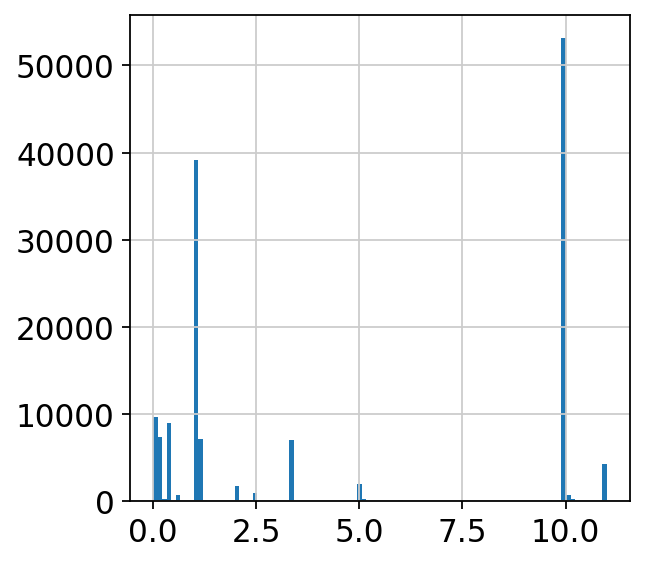

<IPython.core.display.Javascript object>

In [58]:
# plt.hist()
dose_values = datasets["training"].drugs[datasets["training"].drugs > 0].numpy()
dose_values = np.clip(dose_values, 0, 11)
plt.hist(dose_values, bins=100)

In [171]:
adata_subset = adata[adata.obs.split1 == "test"].copy()
cutoff = 5


def create_categories(adata, group: list):
    pert_cat = ""
    if "cell_line" in group:
        pert_cat += adata.obs.cell_type.astype(str)
    if "drugs" in group:
        pert_cat += "_" + adata.obs.condition.astype(str)
    if "dose" in group:
        pert_cat += "_" + adata.obs.dose_val.astype(str)

    pert_cat = pert_cat[pert_cat.apply(lambda s: "DMSO" not in s)]
    return pert_cat


def valid_categories(cats, cutoff):
    return cats.value_counts().index[cats.value_counts() > cutoff]

<IPython.core.display.Javascript object>

In [172]:
# group by cell_line, drug, and dose
pert_cat = create_categories(adata_subset, ["cell_line", "drugs", "dose"])

cat_values = pert_cat.astype("category").cat.categories
valid_cats = valid_categories(pert_cat, cutoff)
print(
    f'With this setting, the adata object has {len(cat_values)} differnt "pert_categories"'
)
print(
    f"From a total of {len(pert_cat)} obs, {pert_cat.isin(valid_cats).sum()} belong to categories with more than {cutoff} obs, that is {100*pert_cat.isin(valid_cats).sum()/len(pert_cat):.2f}%"
)

With this setting, the adata object has 12549 differnt "pert_categories"
From a total of 19623 obs, 1206 belong to categories with more than 5 obs, that is 6.15%


<IPython.core.display.Javascript object>

In [173]:
# group by drug and dose
pert_cat = create_categories(adata_subset, ["drugs", "dose"])

cat_values = pert_cat.astype("category").cat.categories
valid_cats = valid_categories(pert_cat, cutoff)
print(
    f'With this setting, the adata object has {len(cat_values)} differnt "pert_categories"'
)
print(
    f"From a total of {len(pert_cat)} obs, {pert_cat.isin(valid_cats).sum()} belong to categories with more than {cutoff} obs, that is {100*pert_cat.isin(valid_cats).sum()/len(pert_cat):.2f}%"
)

With this setting, the adata object has 2645 differnt "pert_categories"
From a total of 19623 obs, 15416 belong to categories with more than 5 obs, that is 78.56%


<IPython.core.display.Javascript object>

In [174]:
# group by cell_type and drug
pert_cat = create_categories(adata_subset, ["cell_line", "drugs"])

cat_values = pert_cat.astype("category").cat.categories
valid_cats = valid_categories(pert_cat, cutoff)
print(
    f'With this setting, the adata object has {len(cat_values)} differnt "pert_categories"'
)
print(
    f"From a total of {len(pert_cat)} obs, {pert_cat.isin(valid_cats).sum()} belong to categories with more than {cutoff} obs, that is {100*pert_cat.isin(valid_cats).sum()/len(pert_cat):.2f}%"
)

With this setting, the adata object has 6774 differnt "pert_categories"
From a total of 19623 obs, 8308 belong to categories with more than 5 obs, that is 42.34%


<IPython.core.display.Javascript object>